In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__

'2.3.0'

In [2]:
mnist = tf.keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [13]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

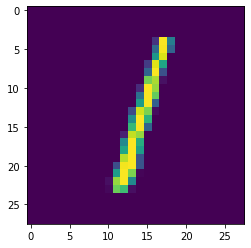

In [8]:
plt.imshow(test_images[2])

In [9]:
test_labels[2]

1

In [14]:
dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(1000)

In [15]:
dataset

<BatchDataset shapes: ((None, 28, 28), (None,)), types: (tf.uint8, tf.uint8)>

In [16]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(30, activation='relu'))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [18]:
class TestModel(tf.keras.Model):
    def __init__(self, d1, d2, rate=0.1):
        super(TestModel, self).__init__()
    
        self.flat = tf.keras.layers.Flatten()
        self.dense = tf.keras.layers.Dense(d1, activation='relu')
        self.final_layer = tf.keras.layers.Dense(d2, activation='softmax')
    
    def call(self, inp):
        
        output = self.flat(inp)
        output = self.dense(output)
        final_output = self.final_layer(output)
    
        return final_output

In [19]:
model2 = TestModel(30, 10)

In [43]:
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate)

In [44]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy() #from_logits=True

In [45]:
EPOCHS = 3
for epoch in range(EPOCHS):
    for images, labels in dataset :
        with tf.GradientTape() as tape:
            output = model1(images)
            loss = loss_object(labels, output)
        gradients = tape.gradient(loss, model1.trainable_variables)    
        optimizer.apply_gradients(zip(gradients, model1.trainable_variables))
    
    print('EPOCHS: {}\tLOSS: {:.4f}'.format(epoch, loss.numpy()))

EPOCHS: 0	LOSS: 0.3718
EPOCHS: 1	LOSS: 0.3373
EPOCHS: 2	LOSS: 0.3151


In [31]:
dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(10)

In [32]:
tf.shape(test_images)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([10000,    28,    28])>

In [48]:
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
for images, labels in testset :
    output = model1(images)
    accuracy.update_state(labels, output)

In [49]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.887>

In [20]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model1.fit(dataset, epochs=10)

Epoch 1/10
60/60 [==============================] - 0s 5ms/step - loss: 17.5256 - accuracy: 0.4419
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 1.7268 - accuracy: 0.4981
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 1.3963 - accuracy: 0.6235
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 1.1905 - accuracy: 0.6879
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 1.0396 - accuracy: 0.7268
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.9266 - accuracy: 0.7580
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 0.8397 - accuracy: 0.7830
Epoch 8/10
60/60 [==============================] - 0s 4ms/step - loss: 0.7707 - accuracy: 0.7997
Epoch 9/10
60/60 [==============================] - 0s 4ms/step - loss: 0.7150 - accuracy: 0.8152
Epoch 10/10
60/60 [==============================] - 0s 4ms/step - loss: 0.6680 - accuracy: 0.8278


In [22]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model2.fit(dataset, epochs=10)

Epoch 1/10
60/60 [==============================] - 0s 4ms/step - loss: 0.4596 - accuracy: 0.8733
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 0.4460 - accuracy: 0.8766
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 0.4295 - accuracy: 0.8795
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 0.4145 - accuracy: 0.8825
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 0.4008 - accuracy: 0.8852
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3877 - accuracy: 0.8886
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3744 - accuracy: 0.8910
Epoch 8/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3637 - accuracy: 0.8937
Epoch 9/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3547 - accuracy: 0.8960
Epoch 10/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3445 - accuracy: 0.8984


In [28]:
model2.evaluate(dataset)

60/60 [==============================] - 0s 5ms/step - loss: 0.3388 - accuracy: 0.8990


[0.33880218863487244, 0.8989999890327454]

In [29]:
testset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(1000)

In [30]:
model2.evaluate(testset)

10/10 [==============================] - 0s 5ms/step - loss: 0.4257 - accuracy: 0.8909


[0.4257272481918335, 0.8909000158309937]

In [40]:
test = tf.expand_dims(test_images[2], 0)
test.shape

TensorShape([1, 28, 28])

In [41]:
test = tf.expand_dims(test_images[2], 0)
result = model2(test)
print(result)
result = tf.argmax(result, axis=-1)
print(result)

tf.Tensor(
[[2.6229646e-14 9.9999881e-01 2.8866757e-14 4.2126339e-19 2.0462688e-14
  9.2400211e-07 1.3016066e-09 2.6018540e-13 2.0456361e-07 2.3519306e-08]], shape=(1, 10), dtype=float32)
tf.Tensor([1], shape=(1,), dtype=int64)


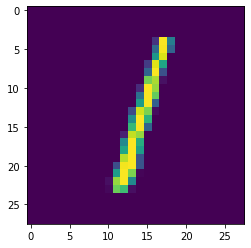

In [34]:
plt.imshow(test_images[2])